In [2]:
!pip install yfinance

In [3]:
import yfinance as yf # yahoo finance Â•ó‰ª∂
import pandas as pd # ÁµêÊßãÂåñË≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

In [4]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "3708.tw"
'''‰ªäÂ§©ÂæÄÂâçÁÆóÂπæÂ§©'''
# Ë≥áÊñôÁµêÊùüÊôÇÈñì
end = dt.date.today()
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñô(ÁèæÂú®-ÈÅéÂèñ180Â§©)
start = end - dt.timedelta(days=180)

# ÂèÉÊï∏1: ËÇ°Á•®‰ª£Ëôü, ÂèÉÊï∏2: ÈñãÂßãÊôÇÈñì, ÂèÉÊï∏3: ÁµêÊùüÊôÇÈñì
df = yf.download(stock_id, start=start, end=end).reset_index()

# Âà™Èô§ Ticker Ê¨Ñ‰Ωç‰∏¶Âèñ‰ª£
df.columns = df.columns.droplevel('Ticker')

df


/tmp/ipython-input-2081871013.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price       Date       Close        High         Low        Open   Volume
0     2025-03-25   79.257690   81.193165   79.160918   81.193165   207274
1     2025-03-26   79.257690   79.838331   79.064139   79.257690   141031
2     2025-03-27   79.160919   79.354464   78.580271   79.257691   144023
3     2025-03-28   76.644791   79.160914   75.580281   79.160914   694591
4     2025-03-31   69.193214   73.644804   69.193214   73.644804  1468038
..           ...         ...         ...         ...         ...      ...
119   2025-09-15  119.500000  122.500000  116.000000  118.500000  4296564
120   2025-09-16  117.000000  122.500000  117.000000  120.000000  3861419
121   2025-09-17  113.500000  117.500000  113.000000  116.000000  1666500
122   2025-09-18  114.500000  115.500000  112.000000  115.500000  1291170
123   2025-09-19  116.000000  117.500000  113.500000  115.500000  1912307

[124 rows x 6 columns]

# **1.1ÊäÄË°ìÊåáÊ®ôÁöÑË®àÁÆó**
 MA„ÄÅRSI„ÄÅMACD

In [5]:
# Ë®àÁÆó8Êó• SMA
df['SMA8'] = df['Close'].rolling(window=8).mean()
# Ë®àÁÆó13Êó• SMA
df['SMA13'] = df['Close'].rolling(window=13).mean()
# Ë®àÁÆó20Êó• SMA
df['SMA20'] = df['Close'].rolling(window=20).mean()

# ÂàóÂç∞ÊúÄÂæåÁ≠ÜÊï∏
df.tail()

Price       Date  Close   High    Low   Open   Volume      SMA8       SMA13  \
119   2025-09-15  119.5  122.5  116.0  118.5  4296564  115.8125  121.538462   
120   2025-09-16  117.0  122.5  117.0  120.0  3861419  115.9375  120.461538   
121   2025-09-17  113.5  117.5  113.0  116.0  1666500  115.7500  118.115385   
122   2025-09-18  114.5  115.5  112.0  115.5  1291170  115.5625  116.923077   
123   2025-09-19  116.0  117.5  113.5  115.5  1912307  116.0000  116.115385   

Price    SMA20  
119    126.050  
120    125.650  
121    125.175  
122    124.150  
123    122.525

# MACD + RSI (Âà§Êñ∑Ë≤∑Ë≥£Èªû)

In [6]:
# 12Êó• EMA
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
# 26Êó• EMA
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

# DIF (Âø´Á∑ö) = EMA12 - EMA26
df['DIF'] = df['EMA12'] - df['EMA26']

# MACD = DIF ÁöÑ9Êó• EMA (ÊÖ¢Á∑ö:Ë®àÁÆóÂá∫DIFÂæåÔºåÂÜçÂèñDIFÁöÑNÊó•ÊåáÊï∏ÁßªÂãïÂπ≥ÂùáÁ∑öEMA(‰∏ÄËà¨‰ΩøÁî®9Êó•Â§©Êï∏)Âç≥Âæó)
df["MACD"] = df["DIF"].ewm(span=9, adjust=False).mean()

# OSC (Êü±ÁãÄÂúñ) = DIF - MACD
df["OSC"] = df["DIF"] - df["MACD"]

# ----------RSI-------------
# Ë®àÁÆóÊØèÂÄã‰∫§ÊòìÊó•ÁöÑÂÉπÊ†ºËÆäÂãïÔºåÂç≥Áï∂Â§©Êî∂Áõ§ÂÉπËàáÂâç‰∏ÄÂ§©Êî∂Áõ§ÂÉπÁöÑÂ∑ÆÁï∞
df['Change'] = df['Close'].diff()

# Â∞áËÆäÂãïÂÄº‰∏≠ÁöÑÊ≠£Êï∏ÈÉ®ÂàÜË¶ñÁÇ∫ "Gain" (Â¢ûÁõä)ÔºåÂ¶ÇÊûúËÆäÂãïÁÇ∫Ë≤†ÂâáË®òÁÇ∫0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# Â∞áËÆäÂãïÂÄº‰∏≠ÁöÑË≤†Êï∏ÈÉ®ÂàÜË¶ñÁÇ∫ "Loss" (ÊêçÂ§±)ÔºåÂèñÂÖ∂ÁµïÂ∞çÂÄºÔºåÂ¶ÇÊûúËÆäÂãïÁÇ∫Ê≠£ÂâáË®òÁÇ∫0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

# Ë®àÁÆóÈÅéÂéª14ÂÄã‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÂ¢ûÁõä
df['AvgGain'] = df['Gain'].rolling(window=14).mean()

# Ë®àÁÆóÈÅéÂéª14ÂÄã‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊêçÂ§±
df['AvgLoss'] = df['Loss'].rolling(window=14).mean()

# Ë®àÁÆóÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ÁöÑÁõ∏Â∞çÂº∑Â∫¶ (RS) ÔºåÂç≥Âπ≥ÂùáÂ¢ûÁõäËàáÂπ≥ÂùáÊêçÂ§±ÁöÑÊØîÂÄº
df['RS'] = df['AvgGain'] / df['AvgLoss']

# Ë®àÁÆóÁõ∏Â∞çÂº∑Âº±ÊåáÊï∏ (RSI) Ôºå‰ΩøÁî® RS ÂÖ¨ÂºèË®àÁÆóÂá∫‰æÜ
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Âà™Èô§‰∏çÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
df.drop(['Change', 'Gain', 'Loss', 'AvgGain', 'AvgLoss', 'RS'], axis=1, inplace=True)

df



Price       Date       Close        High         Low        Open   Volume  \
0     2025-03-25   79.257690   81.193165   79.160918   81.193165   207274   
1     2025-03-26   79.257690   79.838331   79.064139   79.257690   141031   
2     2025-03-27   79.160919   79.354464   78.580271   79.257691   144023   
3     2025-03-28   76.644791   79.160914   75.580281   79.160914   694591   
4     2025-03-31   69.193214   73.644804   69.193214   73.644804  1468038   
..           ...         ...         ...         ...         ...      ...   
119   2025-09-15  119.500000  122.500000  116.000000  118.500000  4296564   
120   2025-09-16  117.000000  122.500000  117.000000  120.000000  3861419   
121   2025-09-17  113.500000  117.500000  113.000000  116.000000  1666500   
122   2025-09-18  114.500000  115.500000  112.000000  115.500000  1291170   
123   2025-09-19  116.000000  117.500000  113.500000  115.500000  1912307   

Price      SMA8       SMA13    SMA20       EMA12       EMA26       DIF  \
0           NaN         NaN      NaN   79.257690   79.257690  0.000000   
1           NaN         NaN      NaN   79.257690   79.257690  0.000000   
2           NaN         NaN      NaN   79.242803   79.250522 -0.007720   
3           NaN         NaN      NaN   78.843108   79.057505 -0.214397   
4           NaN         NaN      NaN   77.358509   78.326817 -0.968308   
..          ...         ...      ...         ...         ...       ...   
119    115.8125  121.538462  126.050  119.873517  120.570987 -0.697470   
120    115.9375  120.461538  125.650  119.431437  120.306469 -0.875032   
121    115.7500  118.115385  125.175  118.518909  119.802286 -1.283378   
122    115.5625  116.923077  124.150  117.900615  119.409525 -1.508910   
123    116.0000  116.115385  122.525  117.608213  119.156967 -1.548754   

Price      MACD       OSC        RSI  
0      0.000000  0.000000        NaN  
1      0.000000  0.000000        NaN  
2     -0.001544 -0.006176        NaN  
3     -0.044114 -0.170282        NaN  
4     -0.228953 -0.739354        NaN  
..          ...       ...        ...  
119    1.472742 -2.170212  37.323944  
120    1.003187 -1.878219  39.849624  
121    0.545874 -1.829252  37.410072  
122    0.134917 -1.643827  24.347826  
123   -0.201817 -1.346937  34.444444  

[124 rows x 15 columns]

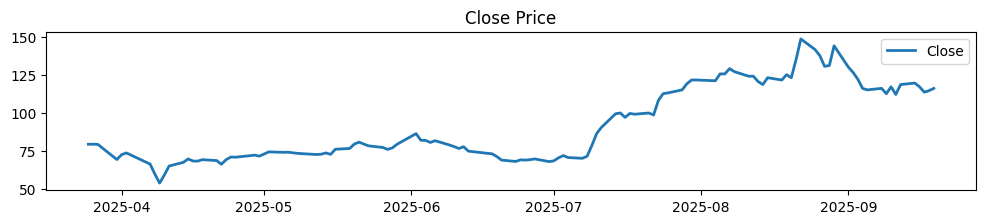

In [7]:
import matplotlib.pyplot as plt
# Áπ™Âúñ
plt.figure(figsize=(12, 7))

# Êî∂Áõ§ÂÉπ
plt.subplot(3,1,1)
plt.plot(df["Date"], df["Close"], label="Close",linewidth=2)
plt.title("Close Price")
plt.legend()



plt.show()

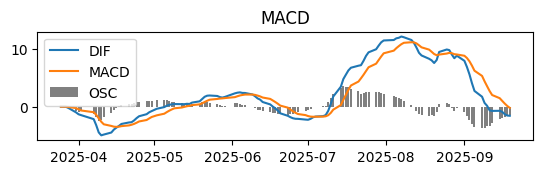

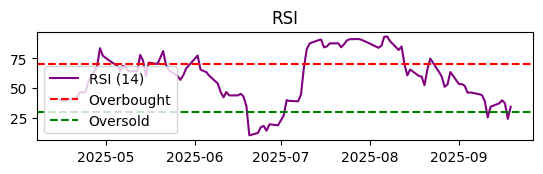

In [10]:

# MACD
plt.subplot(3,1,2)
plt.plot(df["Date"], df["DIF"], label="DIF")
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.bar(df["Date"], df["OSC"], label="OSC", color="gray")
plt.title("MACD")
plt.legend()

plt.show()

# RSI
plt.subplot(3,1,3)
plt.plot(df["Date"], df["RSI"], label="RSI (14)", color="purple")
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("RSI")
plt.legend()

plt.show()

# K Á∑ö

In [11]:
!pip install mplfinance

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


In [12]:
# Â∞áÂéüÂßãÁöÑ dataframe Âú®Âª∫Á´ã‰∏ÄÂÄãÂá∫‰æÜ
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-21'].tail()

Price       Close   High    Low   Open   Volume      SMA8       SMA13  \
Date                                                                    
2025-09-15  119.5  122.5  116.0  118.5  4296564  115.8125  121.538462   
2025-09-16  117.0  122.5  117.0  120.0  3861419  115.9375  120.461538   
2025-09-17  113.5  117.5  113.0  116.0  1666500  115.7500  118.115385   
2025-09-18  114.5  115.5  112.0  115.5  1291170  115.5625  116.923077   
2025-09-19  116.0  117.5  113.5  115.5  1912307  116.0000  116.115385   

Price         SMA20       EMA12       EMA26       DIF      MACD       OSC  \
Date                                                                        
2025-09-15  126.050  119.873517  120.570987 -0.697470  1.472742 -2.170212   
2025-09-16  125.650  119.431437  120.306469 -0.875032  1.003187 -1.878219   
2025-09-17  125.175  118.518909  119.802286 -1.283378  0.545874 -1.829252   
2025-09-18  124.150  117.900615  119.409525 -1.508910  0.134917 -1.643827   
2025-09-19  122.525  117.608213  119.156967 -1.548754 -0.201817 -1.346937   

Price             RSI  
Date                   
2025-09-15  37.323944  
2025-09-16  39.849624  
2025-09-17  37.410072  
2025-09-18  24.347826  
2025-09-19  34.444444

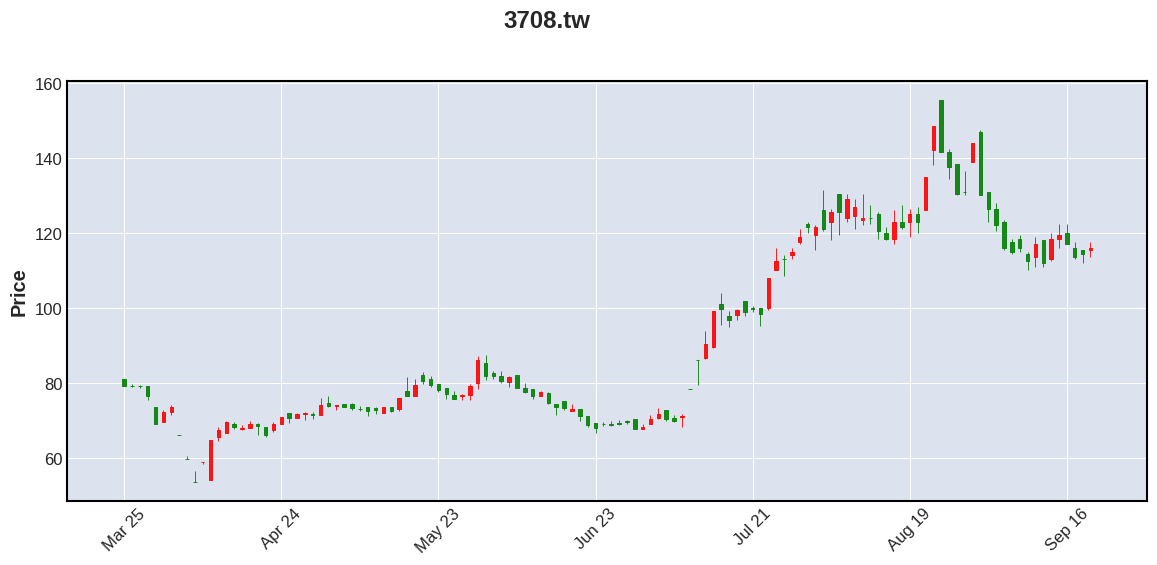

In [13]:
import mplfinance as mpf
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color)

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))


In [14]:
import numpy as np  # ÂºïÂÖ• numpyÔºåÁî®ÊñºÊï∏ÊìöËôïÁêÜÂíåÊï∏ÂÄºÈÅãÁÆó
from sklearn.model_selection import train_test_split  # ÂºïÂÖ• train_test_splitÔºåÁî®ÊñºÂ∞áÊï∏ÊìöÈõÜÊãÜÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
from sklearn.metrics import mean_squared_error  # ÂºïÂÖ• mean_squared_error Áî®ÊñºË©ï‰º∞Ê®°ÂûãÊÄßËÉΩ

In [33]:
# Ê®ôÁ±§: È†êÊ∏¨Êú™‰æÜ5Â§©ÁöÑÂÉπÊ†ºÔºåËàâ‰æãË™™Êòé:Áî®ÊäÄË°ìÊåáÊ®ôÈ†êÊ∏¨ÈöîÂ§©ÁöÑÊî∂Áõ§ÂÉπ
n = 5
# Ê®ôÁ±§: ÈöîÊó•Êî∂Áõ§ÂÉπ > Áï∂Êó•Êî∂Áõ§ÂÉπ ‚Üí 1 (Êº≤)ÔºåÂê¶Ââá 0 (Ë∑å)
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

# ÂéªÈô§Áº∫Â§±ÂÄº
df.dropna(inplace=True)

features = ["DIF", "MACD", "OSC", "RSI"]
X = df[features].dropna()
y = df["Target"].dropna()

X.shape, y.shape

((90, 4), (90,))

In [34]:
# Â∞áÊï∏ÊìöÈõÜ X ÂíåÊ®ôÁ±§ y ÊãÜÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
# test_size=0.2 Ë°®Á§∫Ê∏¨Ë©¶ÈõÜ‰ΩîÂÖ®ÈÉ®Êï∏ÊìöÁöÑ 20% --> 80% ÁöÑË≥áÊñô‰ΩúÁÇ∫Ë®ìÁ∑¥Ôºå20% ÁöÑË≥áÊñô‰ΩúÁÇ∫Ê∏¨Ë©¶
# shuffle=False Ë°®Á§∫Âú®ÊãÜÂàÜÊï∏ÊìöÊôÇ‰∏çÊâì‰∫ÇÂéüÂßãÊï∏ÊìöÁöÑÈ†ÜÂ∫è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Êü•ÁúãÊãÜÂàÜÂæåË®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÂΩ¢ÁãÄ
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 4), (18, 4), (72,), (18,))

# Á∑öÊÄßÂõûÊ≠∏

In [35]:
# ÂºïÂÖ•Á∑öÊÄßÂõûÊ≠∏Ê®°Âûã
from sklearn.linear_model import LinearRegression

# Âª∫Á´ã‰∏¶Ë®ìÁ∑¥Á∑öÊÄßÂõûÊ≠∏Ê®°Âûã
model = LinearRegression()
model.fit(X_train, y_train)

# È†êÊ∏¨
y_pred = model.predict(X_test)

# Ë©ï‰º∞
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãRMSE: {rmse:.2f}")

# ‰ΩøÁî®Ê®°ÂûãÈÄ≤Ë°åÊú™‰æÜÂÉπÊ†ºËµ∞Âã¢È†êÊ∏¨
future_pred = model.predict(X[-1:])  # ‰ΩøÁî®ÊúÄÊñ∞ÁöÑÊï∏ÊìöÈÄ≤Ë°åÈ†êÊ∏¨
print(f"Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ{n}Â§©ÁöÑÂÉπÊ†º: {future_pred[0]:.2f}")

Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãRMSE: 0.57
Á∑öÊÄßÂõûÊ≠∏Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜ5Â§©ÁöÑÂÉπÊ†º: 0.21


In [39]:
from sklearn.svm import SVC  # ÂºïÂÖ• SVM Ê®°Âûã
# === Ë®ìÁ∑¥ SVM Ê®°Âûã ===
svm = SVC(kernel="rbf", C=1.0, gamma="scale")  # Â∏∏Áî® rbf kernel
svm.fit(X_train, y_train)

# === È†êÊ∏¨ ===
y_pred = svm.predict(X_test)
y_pred
future_pred = model.predict(X.iloc[-1:])[0]
if future_pred == 1:
    print("Ê®°ÂûãÈ†êÊ∏¨: ÊòéÂ§©Êî∂Áõ§ÂÉπÂèØËÉΩ‰∏äÊº≤ üìà")
else:
    print("Ê®°ÂûãÈ†êÊ∏¨: ÊòéÂ§©Êî∂Áõ§ÂÉπÂèØËÉΩ‰∏ãË∑å üìâ")

Ê®°ÂûãÈ†êÊ∏¨: ÊòéÂ§©Êî∂Áõ§ÂÉπÂèØËÉΩ‰∏ãË∑å üìâ
